# MSA 2024 Phase 2 - Part 1

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [7]:
import pandas as pd

# W store Features 
df0 = pd.read_csv('/Users/elliotbu/Desktop/MSA 2024/W store sales/features.csv')

# W Store Sales 
df1 = pd.read_csv('/Users/elliotbu/Desktop/MSA 2024/W store sales/sales.csv')

# W Stores 
df2 = pd.read_csv('/Users/elliotbu/Desktop/MSA 2024/W store sales/stores.csv')

# W Stores Sales First 10
print(df1.head(10))

# Key Statistical Meansures
print(df1.describe())

# Data Types
print(df1.info())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000

## 2. Clean data

In [8]:
import numpy as np

# Drop NA values
df1.dropna(inplace = True)

# Change the variable name to humanised name
# Converting Data Types to Numberic
# IsHoliday -> Int
df1.rename(columns={"Weekly_Sales": "Weekly Sales", "IsHoliday": "Is Holiday"}, inplace=True)
df1['Is Holiday'] = df1['Is Holiday'].astype(int)

# Handling Outliers Using IQR Method
def remove_outliers(df1, column_name):
    iqr = df1[column_name].quantile(0.75) - df1[column_name].quantile(0.25)
    lower_bound = df1[column_name].quantile(0.25) - 1.5 * iqr
    higher_bound = df1[column_name].quantile(0.75) + 1.5 * iqr
    df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= higher_bound)]
    return df1

numerical_columns = df1.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    df1 = remove_outliers(df1, column)
print("Data after removing outliers:\n", df1.describe())

Data after removing outliers:
                Store           Dept   Weekly Sales  Is Holiday
count  359006.000000  359006.000000  359006.000000    359006.0
mean       22.418372      42.890422   10527.444065         0.0
std        12.791125      29.600663   11317.053760         0.0
min         1.000000       1.000000   -4988.940000         0.0
25%        11.000000      18.000000    1756.037500         0.0
50%        22.000000      35.000000    6363.010000         0.0
75%        33.000000      71.000000   15760.615000         0.0
max        45.000000      99.000000   47393.430000         0.0


## 3. Visualise data

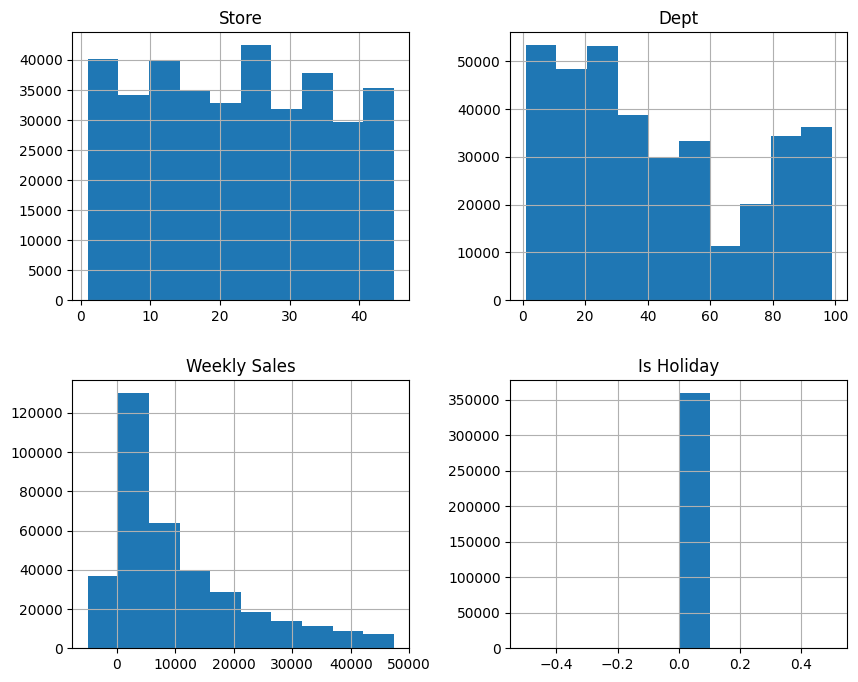

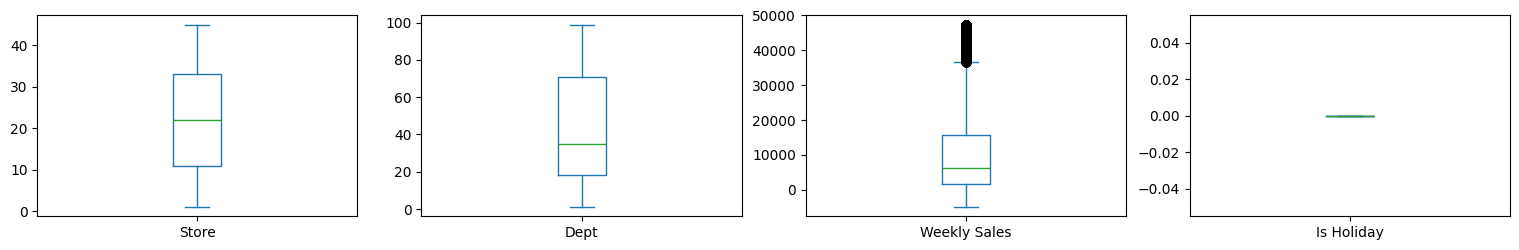

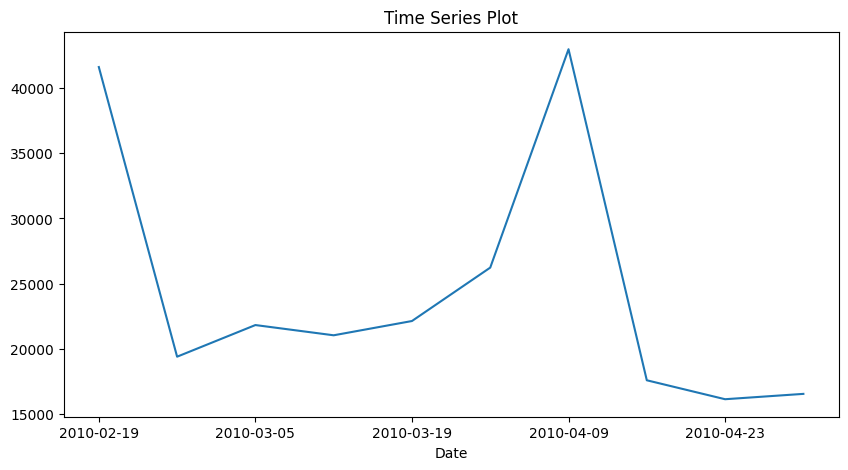

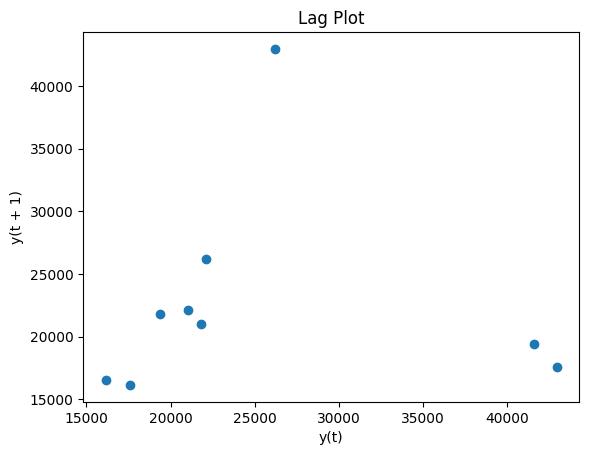

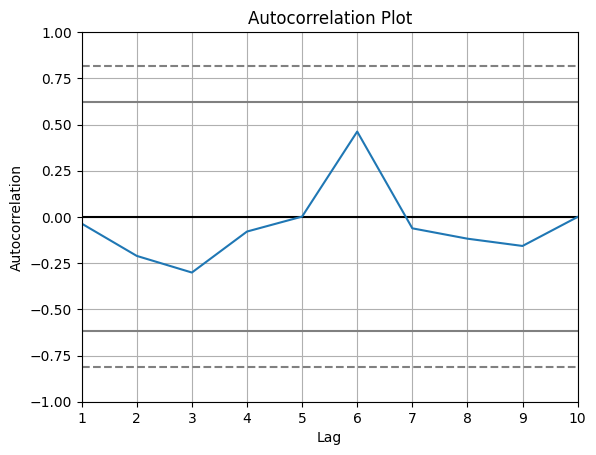

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot

# Histograms 
df1.hist(figsize=(10,8))
plt.show()

# Box plot
df1.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(19,12))
plt.show()

# Time Series Plot
df1[1:11].set_index('Date')['Weekly Sales'].plot(figsize=(10, 5), title='Time Series Plot')
plt.show()

# Lag Plots
lag_plot(df1[1:11]['Weekly Sales'])
plt.title('Lag Plot')
plt.show()

# Autocorrelation Plot
autocorrelation_plot(df1[1:11]['Weekly Sales'])
plt.title('Autocorrelation Plot')
plt.show()


## 4. Identify correlated variables

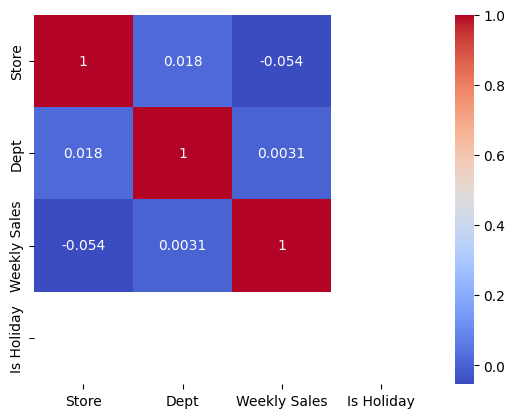

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df1.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

col_corr = set() # No duplicate values

# Find correlation matrix pairs above 0.8
for col_index1 in range(len(corr.columns)):
    for col_index2 in range(col_index1):
        if abs(corr.iloc[col_index1, col_index2]) > 0.8:
            column_name = corr.columns[col_index1]
            col_corr.add(column_name)

# Drop the highly correlated columns
df1.drop(columns=col_corr, inplace=True)

## 5. Summary

Exploratory Data Analysis (EDA):

The initial phase of the analysis focuses on understanding the dataset by conducting an exploratory data analysis (EDA). The dataset comprises features, sales, and store information from a retail chain. Key steps include loading the datasets and examining their structure and summary statistics. This involves displaying the first few records, calculating statistical measures such as mean, standard deviation, minimum, and maximum values, and understanding data types and non-null counts. The primary goal is to get an initial understanding of the dataset's distribution and characteristics.

Preprocessing Steps:

The preprocessing phase involves transforming the data to make it suitable for modeling. This includes creating features and target variables, where the target is the weekly sales, and the features include store, department, date, and holiday indicators. The date field is converted into a numerical format to facilitate analysis. The dataset is then split into training and testing sets using a 70-30 split. This prepares the data for subsequent modeling steps, ensuring that the training and testing sets are appropriately separated to avoid data leakage and ensure the validity of the model evaluation.

Power BI Analysis:

Python-based EDA and preprocessing, Power BI was utilized to create interactive visualizations and dashboards. Power BI provided a user-friendly interface to visualize sales trends, seasonal patterns, and store performance. Key visualizations include line charts showing weekly sales trends, bar charts comparing sales across different stores and departments, and heatmaps to identify peak sales periods. Power BI's drill-down capabilities allowed for detailed exploration of specific data points, enhancing the overall understanding of the dataset. This interactive approach complemented the static analysis done in Python, offering a comprehensive view of the sales data and aiding in identifying key insights and patterns.